# load required modules

In [1]:
import sys, os, pygmt
sys.path.insert(0, '/home/581/da1339/AFIM/src/AFIM/src')
from sea_ice_processor   import SeaIceProcessor
from sea_ice_plotter     import SeaIcePlotter
import numpy             as np
import pandas            as pd
import xarray            as xr
from datetime            import timedelta, date, datetime
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates

# process for fast/pack ice

In [2]:
dt0_str  = "1998-08-01"
dtN_str  = "1999-03-31"
sim_name = 'baseline'
SI_proc  = SeaIceProcessor(sim_name            = sim_name, 
                           ice_speed_threshold = 1e-4)
FI_lo_spd = SI_proc.process_window(dt0_str    = dt0_str,
                                    dtN_str    = dtN_str, 
                                    write_zarr = False,
                                    ow_zarrs   = True)

2025-04-04 12:49:07,661 - INFO - loading data for date period: 1998-08-14 00:00:00 to 1998-08-28 00:00:00
INFO:baseline:loading data for date period: 1998-08-14 00:00:00 to 1998-08-28 00:00:00
2025-04-04 12:49:07,665 - INFO - loading CSV climatology
INFO:baseline:loading CSV climatology
2025-04-04 12:49:07,676 - INFO - using gridded climatology
INFO:baseline:using gridded climatology
2025-04-04 12:49:07,677 - INFO - Averaged observational gridded climatology already exists
/g/data/gv90/da1339/SeaIce/FI_obs/AF_FI_2020db_18yrAvg_gridded.zarr
INFO:baseline:Averaged observational gridded climatology already exists
/g/data/gv90/da1339/SeaIce/FI_obs/AF_FI_2020db_18yrAvg_gridded.zarr
2025-04-04 12:49:07,840 - INFO - using 226-DOY from gridded climatology to associate with this model period
INFO:baseline:using 226-DOY from gridded climatology to associate with this model period
2025-04-04 12:49:07,843 - INFO - constructing list of CICE files to load for this period
INFO:baseline:constructing l

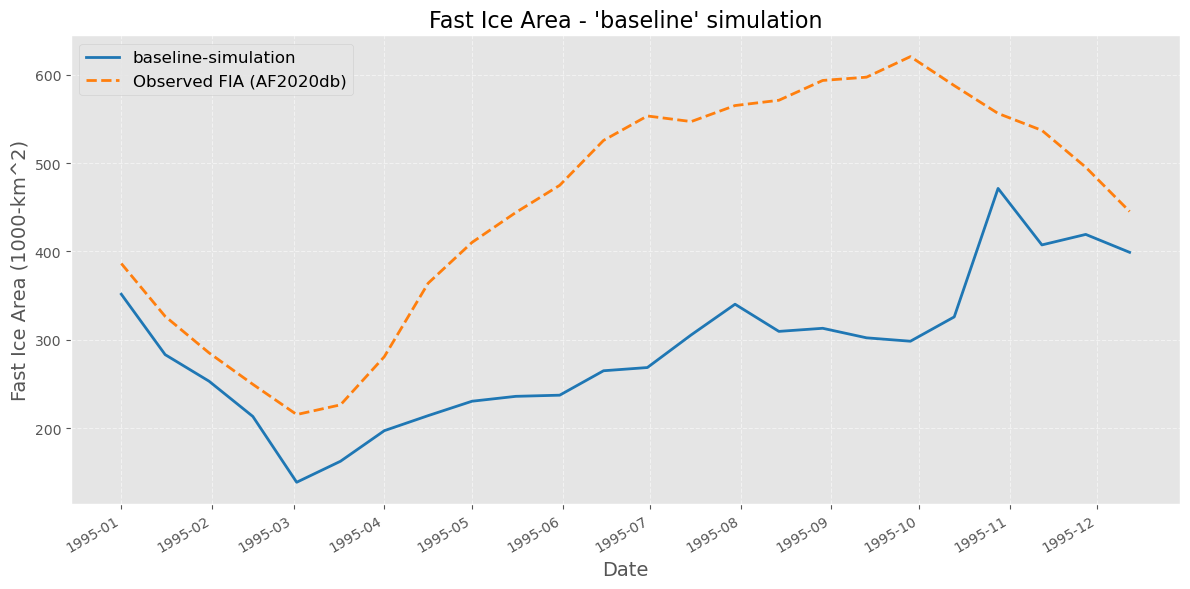

In [13]:
sim_name = 'baseline'
DS = xr.open_mfdataset(f"/g/data/gv90/da1339/afim_output/{sim_name}/FI/fast_ice_1995*", engine='zarr')
plt.figure(figsize=(12, 6))
plt.style.use('ggplot') 
plt.plot(DS['t_dim'], DS['FIA']    , label=f'{sim_name}-simulation' , linewidth=2, color='tab:blue')
plt.plot(DS['t_dim'], DS['FIA_OBS'].sel(sector='circumpolar'), label='Observed FIA (AF2020db)', linewidth=2, linestyle='--', color='tab:orange')
plt.title("Fast Ice Area - 'baseline' simulation", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel(f"Fast Ice Area ({DS.FIA.attrs.get('units', 'unknown')})", fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
SI_proc  = SeaIceProcessor(sim_name            = sim_name, 
                           ice_speed_threshold = 1e-3)
FI_hi_spd = SI_proc.process_window(dt0_str    = dt0_str,
                                    dtN_str    = dtN_str, 
                                    write_zarr = False,
                                    ow_zarrs   = True)

2025-04-04 12:59:20,306 - INFO - loading data for date period: 1998-08-14 00:00:00 to 1998-08-28 00:00:00
INFO:baseline:loading data for date period: 1998-08-14 00:00:00 to 1998-08-28 00:00:00
2025-04-04 12:59:20,308 - INFO - loading CSV climatology
INFO:baseline:loading CSV climatology
2025-04-04 12:59:20,372 - INFO - using gridded climatology
INFO:baseline:using gridded climatology
2025-04-04 12:59:20,374 - INFO - Averaged observational gridded climatology already exists
/g/data/gv90/da1339/SeaIce/FI_obs/AF_FI_2020db_18yrAvg_gridded.zarr
INFO:baseline:Averaged observational gridded climatology already exists
/g/data/gv90/da1339/SeaIce/FI_obs/AF_FI_2020db_18yrAvg_gridded.zarr
2025-04-04 12:59:20,386 - INFO - using 226-DOY from gridded climatology to associate with this model period
INFO:baseline:using 226-DOY from gridded climatology to associate with this model period
2025-04-04 12:59:20,389 - INFO - constructing list of CICE files to load for this period
INFO:baseline:constructing l

In [ ]:
plt.figure(figsize=(12, 6))
plt.style.use('ggplot') 
plt.plot(FI_hi_spd['t_dim'], FI_hi_spd['FIA']    , label=f'{sim_name}-simulation' , linewidth=2, color='tab:blue')
plt.plot(FI_hi_spd['t_dim'], FI_hi_spd['FIA_OBS'], label='Observed FIA (AF2020db)', linewidth=2, linestyle='--', color='tab:orange')
plt.title("Fast Ice Area with simulation results masked with ice speed of <1 mm/s", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel(f"Fast Ice Area ({FI_lo_spd.FIA.attrs.get('units', 'unknown')})", fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# plot 1D analysis

In [ ]:
dt0_str  = "1993-01-01"
dtN_str  = "1993-12-31"
sim_name = 'ktens-max'
plotter  = SeaIcePlotter(sim_name, dt0_str, dtN_str, show_figs=True, ice_type='FI')
plotter.plot_timeseries()

In [ ]:
#plotter.plot_timeseries(var_names=["PI_STRESS"])
plotter.plot_timeseries_compare(
    comparison_name = "tensile-stars",
    sim_names       = ["baseline", "ktens-max", "Pstar-max", "Cstar-min"],
    var_name        = "PIA",
    label_dict      = {"baseline"  : "tensile = 0.2, Pstar = 2.75e4, Cstar = 20",
                       "ktens-max" : "tensile = 0.3, Pstar = 2.75e4, Cstar = 20",
                       "Pstar-max" : "tensile = 0.2, Pstar = 5e4   , Cstar = 20",
                       "Cstar-min" : "tensile = 0.2, Pstar = 2.75e4, Cstar = 10"})

# plot 2D analysis (requires existing FI/PI dataset)

In [ ]:
dt0_str  = "1993-01-01"
dtN_str  = "1999-12-31"
sim_names = ["baseline", "ustar-low", "Cstar-max", "Cstar-min", "Pstar-max", "Pstar-min",
             "ktens-nil", "ktens-min", "ktens-max", "gi-max", "gi-min",
             "Rothrock", "elps-pack", "elps-fast", "elps-max", "elps-def", "elps-mid" ]
for sim_name in sim_names:
    SI_plot = SeaIcePlotter(sim_name, dt0_str, dtN_str, show_figs=False, overwrite=True, single_figure=False)
    SI_plot.prepare_data_for_plotting(var_name='FIP')
    SI_plot.plot_regions()

# generate PBS jobs for analysis

In [ ]:
from pathlib import Path
from datetime import datetime, timedelta

type_of_sea_ice = 'fast_ice'     #'pack_ice' or 'sea_ice'
turn_on_overwrite = False

if turn_on_overwriting:
    overwrite = '--overwrite'
else:
    overwrite = None

if type_of_sea_ice=='fast_ice':
    abbreviation = 'FI'
    switch       = None
elif type_of_sea_ice=='pack_ice':
    abbreviation = 'PI'
    switch       = '--pack_ice'
elif type_of_sea_ice=='sea_ice':
    abbreviation = 'SI'
    switch       = '--sea_ice'

sim_names = ["Cstar-max", "Cstar-min", "Pstar-max", "Pstar-min", "Rothrock","baseline", "oras-sfc-ctl"
             "elps-def", "elps-fast", "elps-max", "elps-mid", "elps-pack", "gi-max",
             "gi-min", "ktens-max", "ktens-min", "ktens-nil", "ustar-low", "van_achter" ]

# Base time: 5 minutes from now
base_time = datetime.now() + timedelta(minutes=5)

pbs_template = """#!/bin/bash
#PBS -N {abbrev}-proc-{name}
#PBS -P gv90
#PBS -l walltime=24:00:00
#PBS -q normalbw
#PBS -l mem=64GB
#PBS -l ncpus=28
#PBS -l storage=gdata/cj50+gdata/jk72+scratch/jk72+gdata/ik11+gdata/hh5+gdata/rt52+gdata/gb6+gdata/gv90
#PBS -M daniel.atwater@utas.edu.au
#PBS -a {start_time}

module purge
module use /g/data/hh5/public/modules
module load conda/analysis3

cd ~/AFIM/src/AFIM/scripts
python3 ./compute_sea_ice.py {name} {switch} {overwrite}
"""

output_dir = Path(f"/home/581/da1339/AFIM/src/sh/analysis/{type_of_sea_ice}")
output_dir.mkdir(exist_ok=True)

for i, sim in enumerate(sim_names):
    start_dt = base_time + timedelta(minutes=5 * i)
    start_str = start_dt.strftime("%y%m%d%H%M")  # YYMMDDhhmm format
    script_content = pbs_template.format(name=sim, start_time=start_str, switch=switch, overwrite=overwrite, abbrev=abbreviation)
    script_path = output_dir / f"{abbreviation}-proc_{sim}.pbs"
    with open(script_path, "w") as f:
        f.write(script_content)

print(f"✓ Generated {len(sim_names)} staggered PBS scripts in: {output_dir.resolve()}")
